# Avocado dataset



Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset :---

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load avocado dataset
df=pd.read_csv("AVOCADO.CSV",parse_dates=["Date"])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
#analys avocado dataset
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Unnamed: 0         AxesSubplot(0.125,0.536818;0.110714x0.343182)
AveragePrice    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Small Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.390714,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

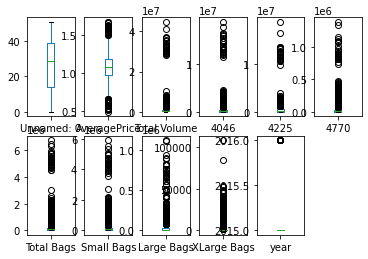

In [5]:
#boxplot for checking outliers
df.plot(kind="box",subplots=True,layout=(2,6))

show distibution

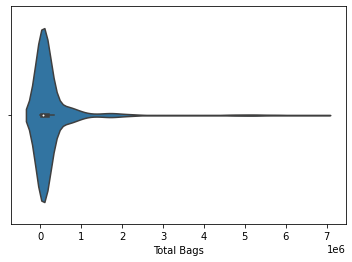

In [6]:
sns.violinplot(df["Total Bags"])

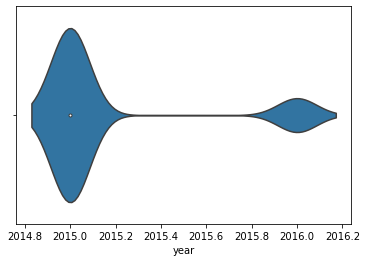

In [7]:
sns.violinplot(df["year"])

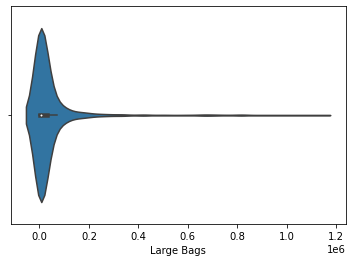

In [8]:
sns.violinplot(df["Large Bags"])

In [9]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [10]:
#checking dtypes
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [11]:
#checking friquancy of region
df["region"].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

In [12]:
#changing region into numeric form
df["region"]=pd.factorize(df.region)[0]
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,0
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,7
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,7
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,7
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,7


In [13]:
#checking numeric value's frequancies
df["region"].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

Show some Visulization for understand relations 

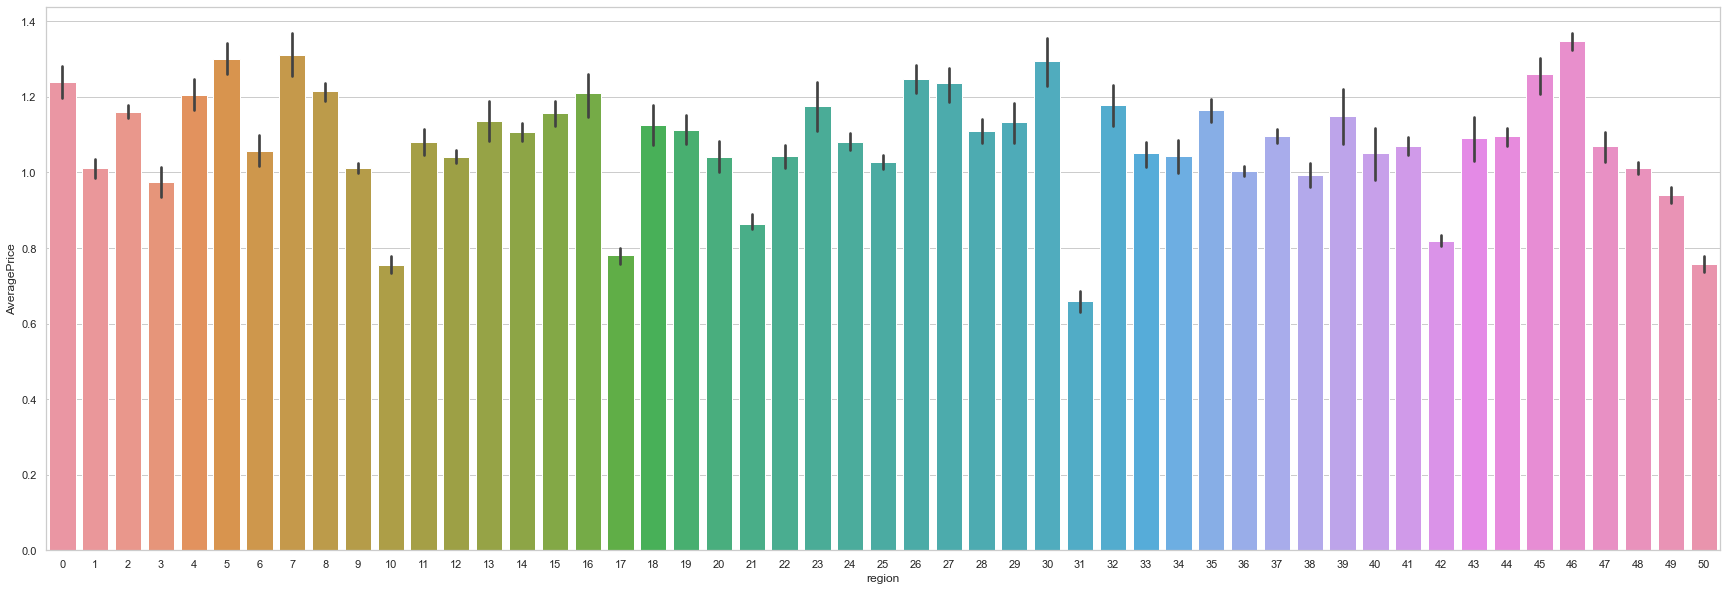

In [14]:
#ploting barplot b/w target columns
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
sns.barplot(x=df["region"],y=df["AveragePrice"],data=df)
plt.show()

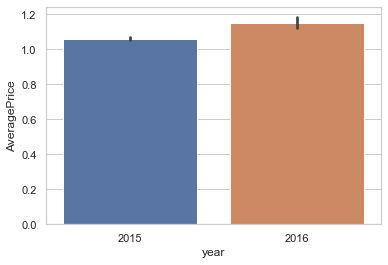

In [15]:
sns.set(style="whitegrid")
sns.barplot(x=df["year"],y=df["AveragePrice"],data=df)

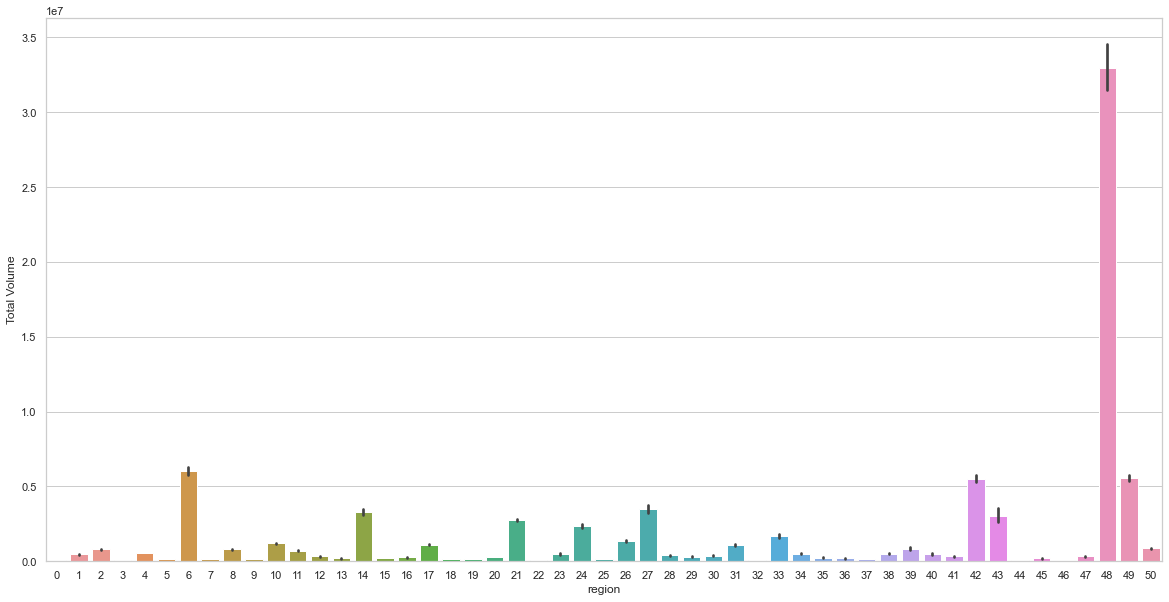

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df["region"],y=df["Total Volume"],data=df)
plt.show()

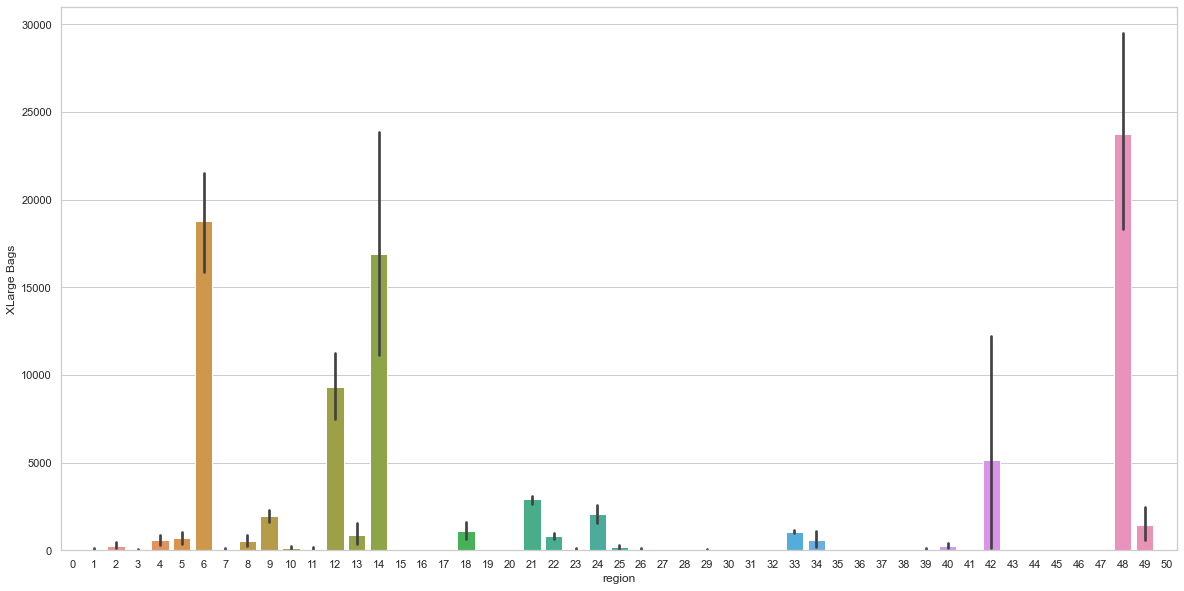

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df["region"],y=df["XLarge Bags"],data=df)
plt.show()

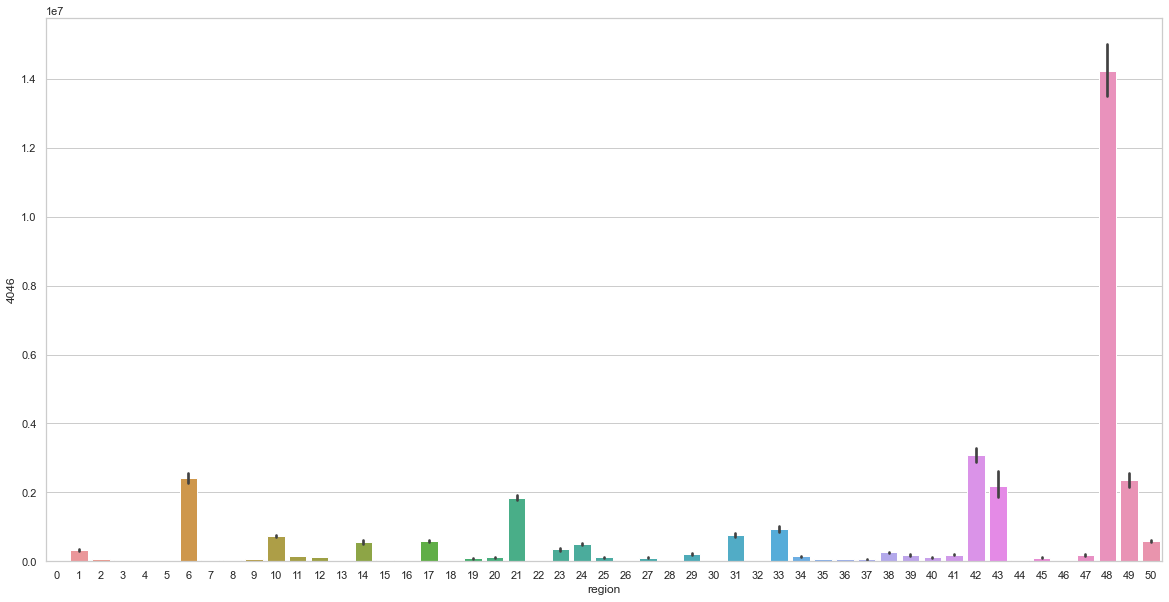

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df["region"],y=df["4046"],data=df)
plt.show()

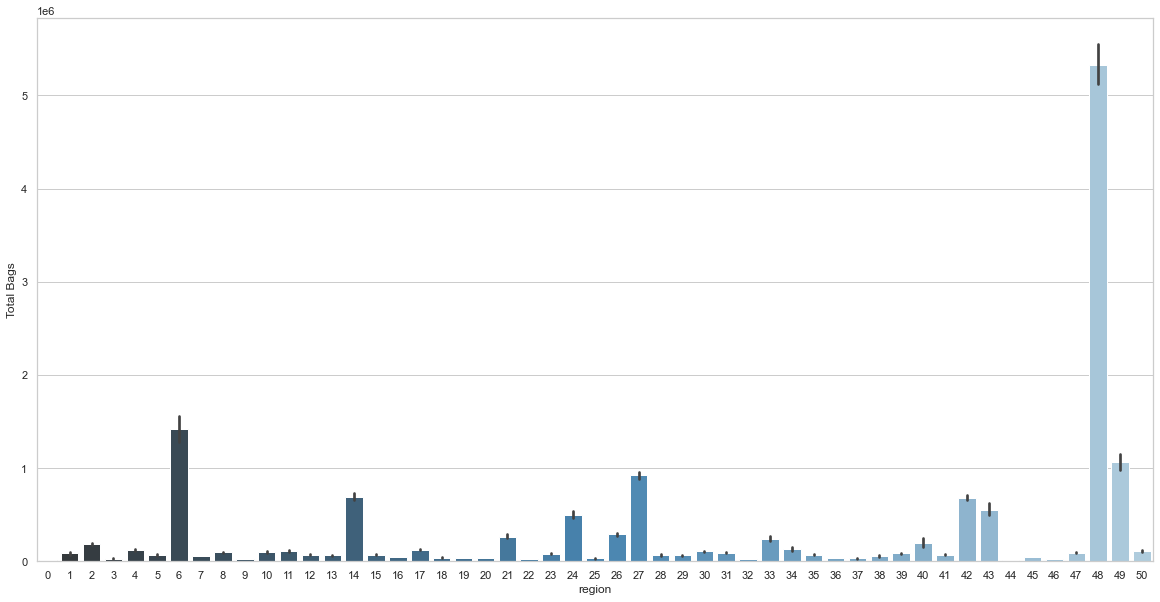

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df["region"],y=df["Total Bags"],data=df,palette="Blues_d")
plt.show()

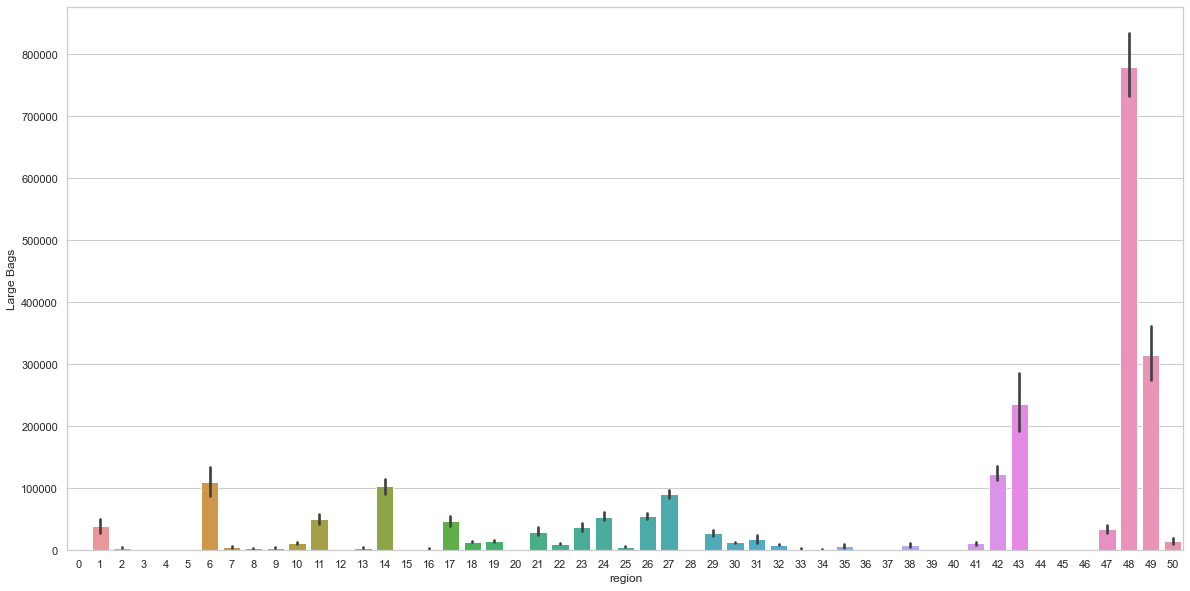

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x=df["region"],y=df["Large Bags"],data=df)
plt.show()

we can see Nashville city has more contribution than others to avocado sell. 

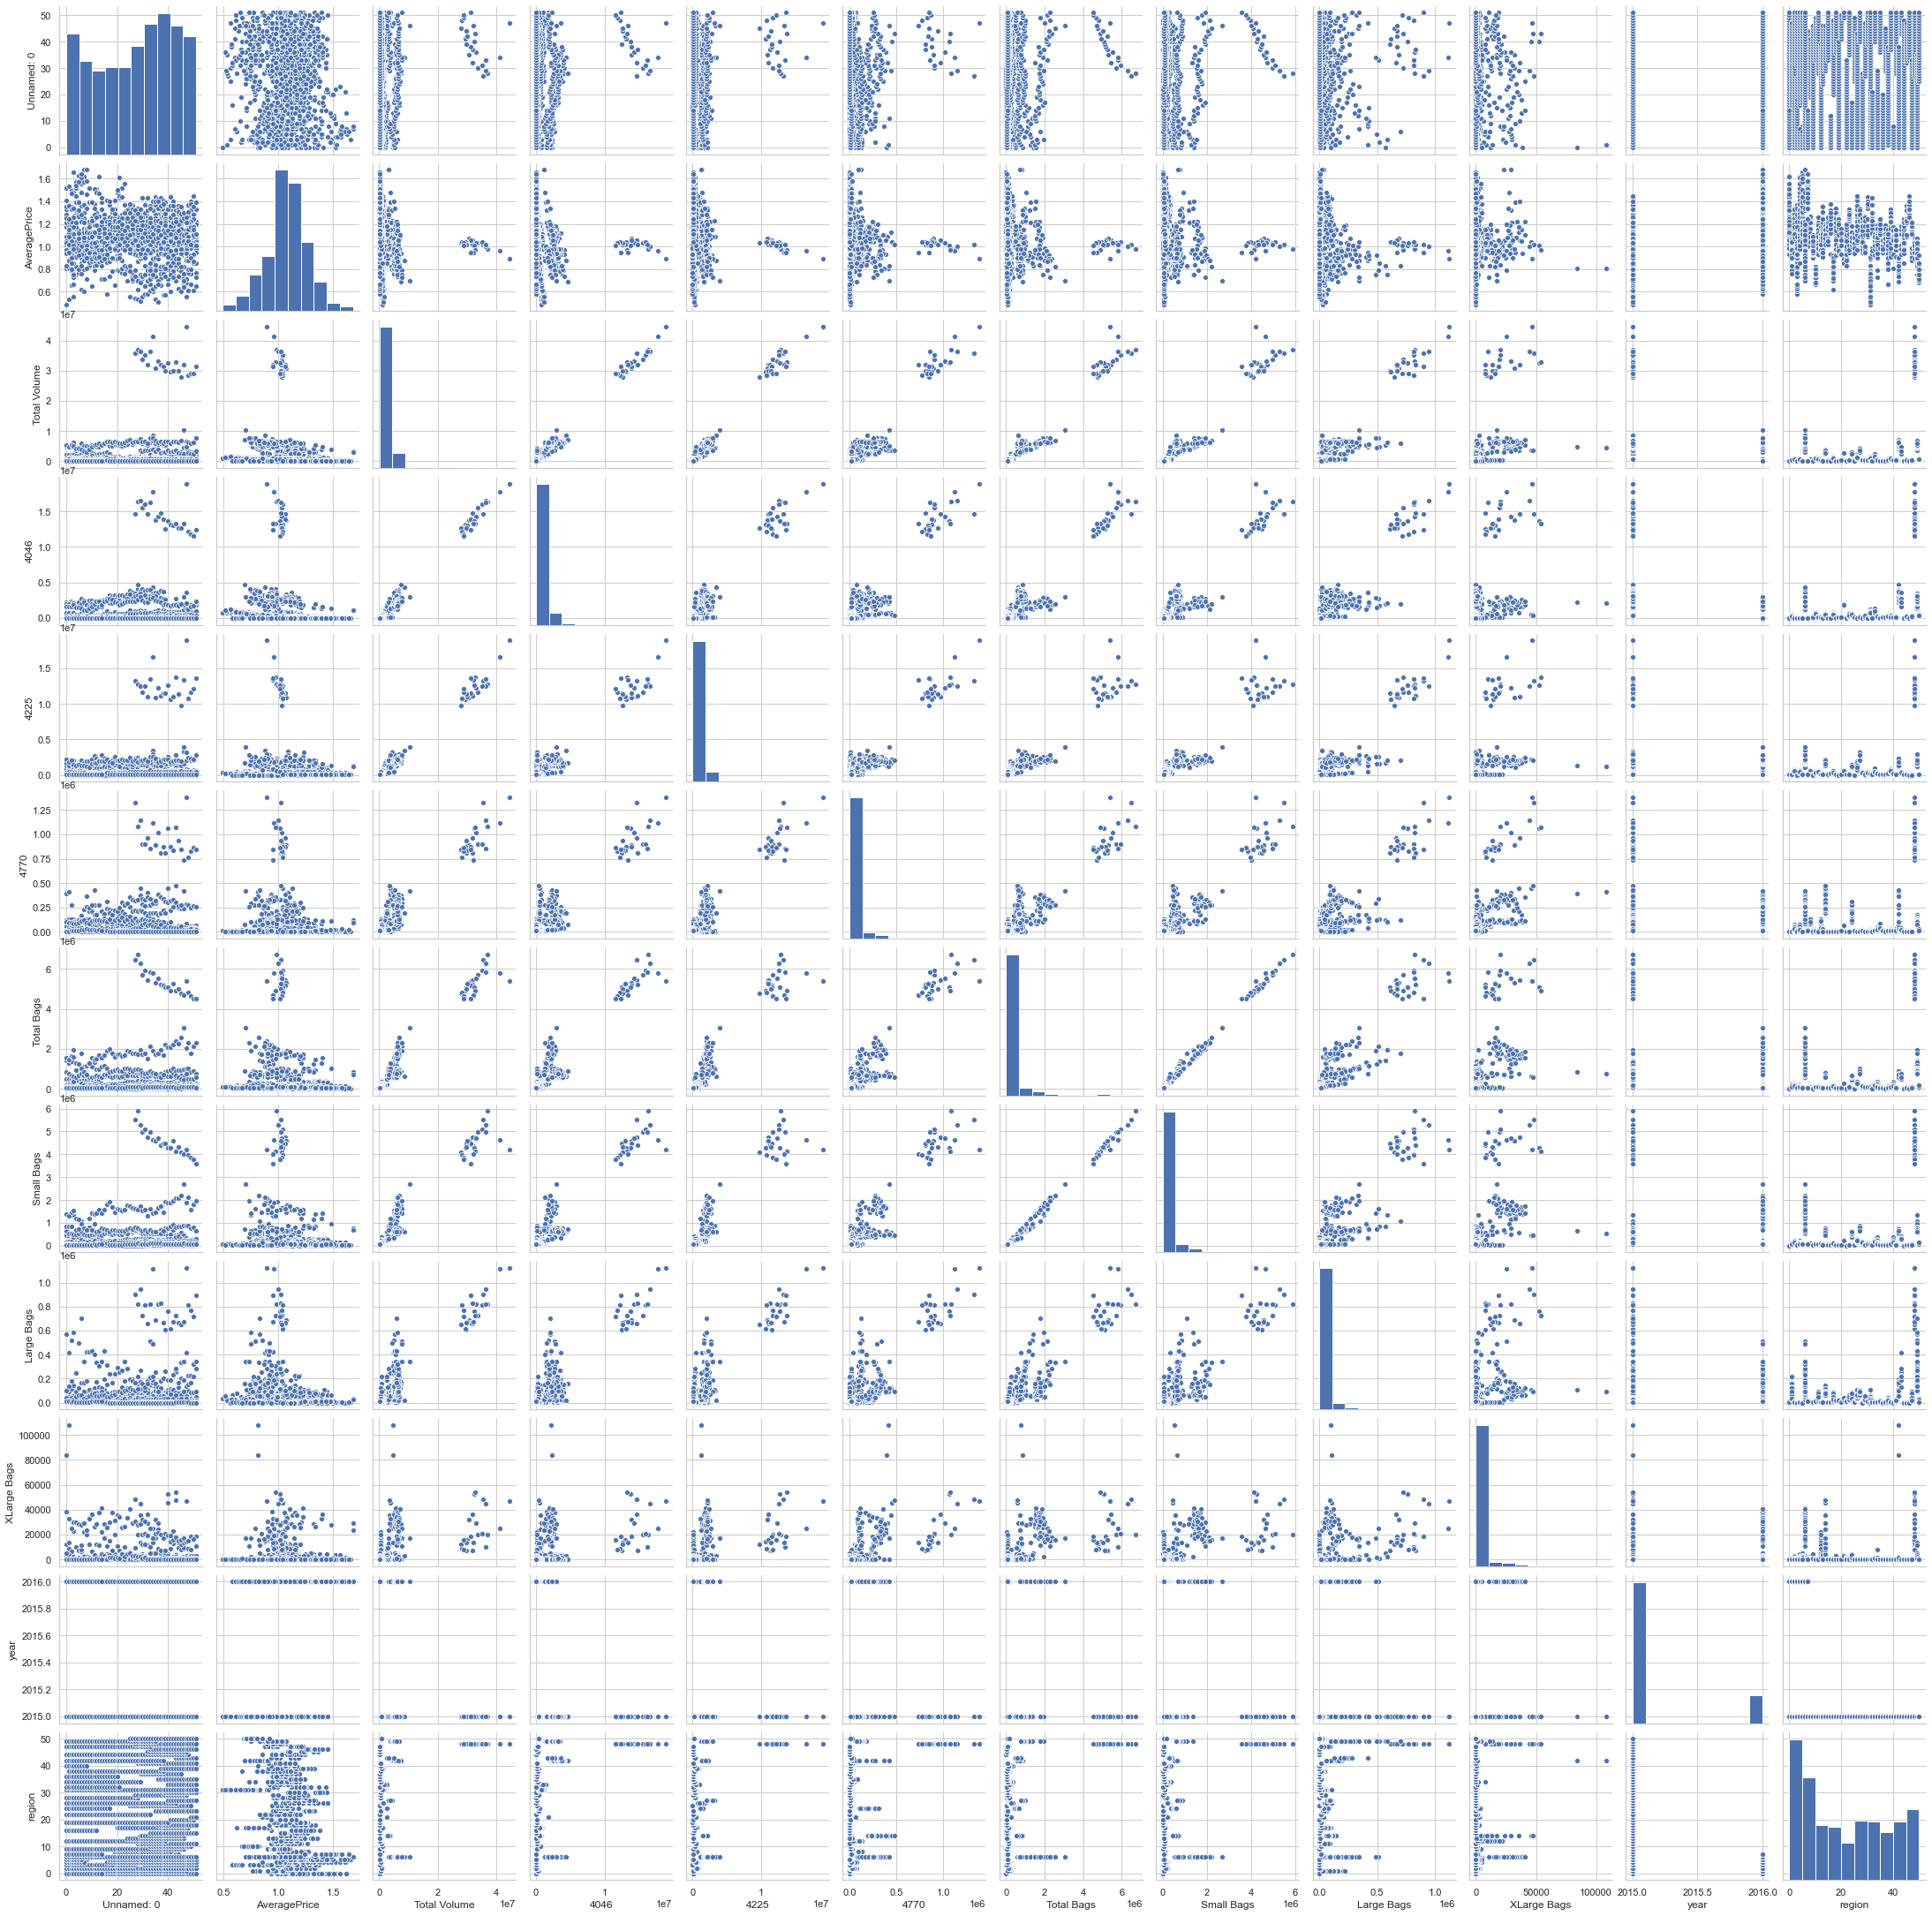

In [21]:
#show all relation with pairplot
sns.pairplot(df)

In [22]:
df["type"].value_counts()

conventional    1517
Name: type, dtype: int64

In [23]:
#drop type columns which have single categorie
df.drop("type",axis=1,inplace=True)

In [24]:
#create new dates dataframe to better undestanding
dates=pd.DataFrame()
dates["Month"]=df["Date"].dt.month_name()
dates["Year"]=df["Date"].dt.year
dates["day"]=df["Date"].dt.day_name()
dates['averagePrice']=df["AveragePrice"]
dates

,Month,Year,day,averagePrice
0,December,2015,Sunday,1.33
1,December,2015,Sunday,1.35
2,December,2015,Sunday,0.93
3,June,2015,Friday,1.08
4,November,2015,Sunday,1.28
...,...,...,...,...
1512,October,2016,Sunday,1.39
1513,September,2016,Saturday,1.51
1514,February,2016,Wednesday,1.48
1515,September,2016,Sunday,1.47


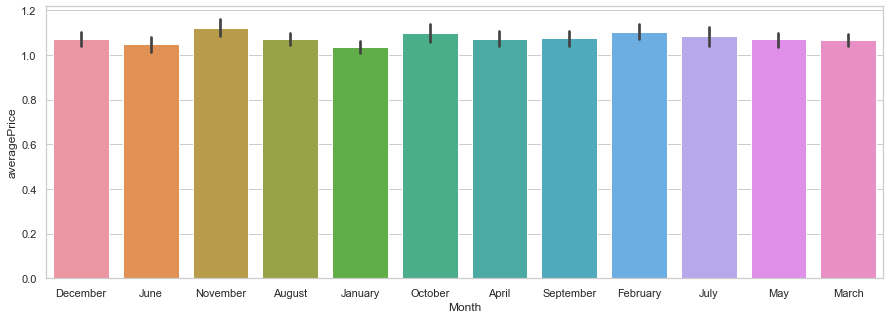

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x=dates["Month"],y=dates["averagePrice"],data=df)

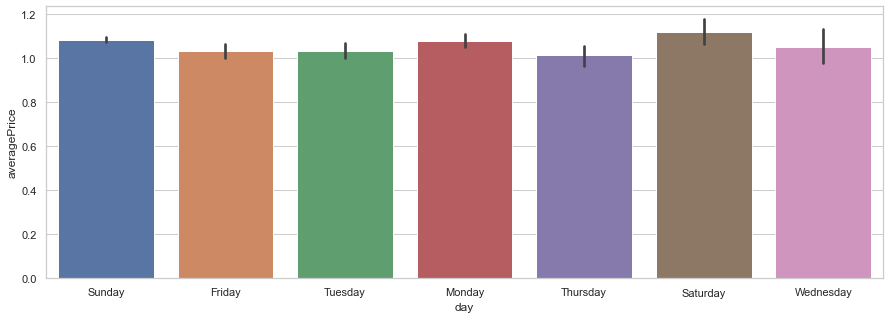

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x=dates["day"],y=dates["averagePrice"],data=df)

In [27]:
#drop date column from dataset
df.drop("Date",axis=1,inplace=True)

In [28]:
df.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            int64
dtype: object

In [29]:
col=df.columns.values
nc=17
nr=10

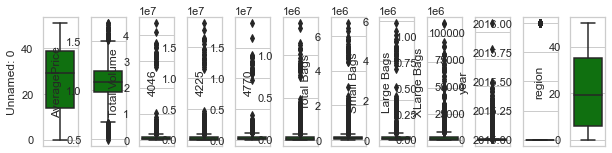

In [30]:
plt.figure(figsize=(12,20))

for i in range(0,len(col)):
    plt.subplot(nr,nc,i+1)
    sns.boxplot(df[col[i]],color="green",orient="v")
    plt.tight_layout()

In [31]:
#checking outliers
z=np.abs(zscore(df))
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [32]:
#Remove outliers
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1436, 12)

In [33]:
#checking skewness
df_new.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

In [34]:
df_new.columns.values

array(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'region'], dtype=object)

checking distribution of skewness

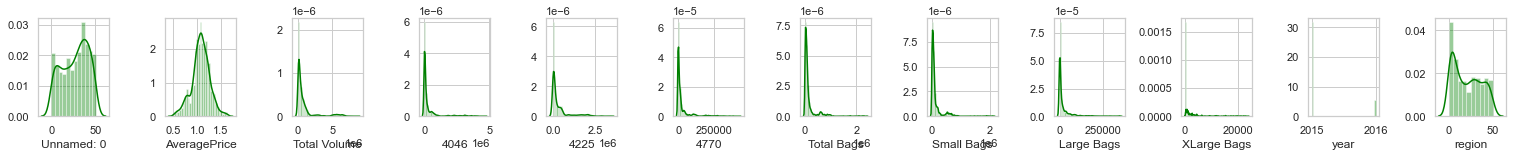

In [35]:
plt.figure(figsize=(30,20))

for i in range(0,len(col)):
    plt.subplot(nr,nc,i+1)
    sns.distplot(df_new[col[i]],color="green")
    plt.tight_layout()

In [36]:
#removing skewness

for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [37]:
df_new.skew()

Unnamed: 0     -0.248948
AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
dtype: float64

Text(0.5, 1.0, 'correlations')

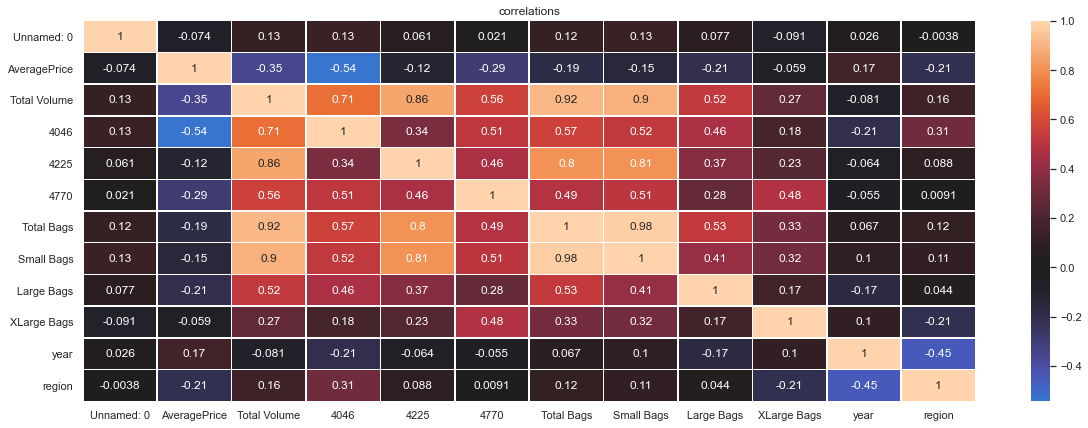

In [38]:
#checking correlations with heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_new.corr(),annot=True,center=0,linewidths=.5)
plt.title("correlations")

# Regression model for Average Price

In [59]:
X=df_new.drop(["AveragePrice","Unnamed: 0"],axis=1)
y=df_new["AveragePrice"]


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7


In [ ]:
#using standardization
sc=StandardScaler()
x=sc.fit_transform(X)

In [60]:
x=pd.DataFrame(x,columns=X.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7


In [61]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC

In [62]:
#checking all models
model=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),Lasso(),Ridge(),ElasticNet()]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=63)

for m in model:
    print("*******************************",m,"********************************")
    m.fit(x_train,y_train)
    predr=m.predict(x_test)
    print("r2:",r2_score(y_test,predr))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,predr)))
    print("MAE:",mean_absolute_error(y_test,predr))
    print("score:",m.score(x_train,y_train))
    print("\n")
                                                                            

******************************* LinearRegression() ********************************
r2: 0.41863142484357696
RMSE: 0.15673289205316368
MAE: 0.12211097883647937
score: 0.38857399725017816


******************************* SVR() ********************************
r2: 0.5517816201243042
RMSE: 0.13761925470115882
MAE: 0.10547149789826446
score: 0.5421940955549086


******************************* KNeighborsRegressor() ********************************
r2: 0.8169617632851782
RMSE: 0.08794381117537851
MAE: 0.06533544303797469
score: 0.8352536092874667


******************************* DecisionTreeRegressor() ********************************
r2: 0.7383520389745817
RMSE: 0.10514607078979055
MAE: 0.0719620253164557
score: 1.0


******************************* Lasso() ********************************
r2: -0.0002757115224660822
RMSE: 0.20558632937813848
MAE: 0.15737793851717902
score: 0.0


******************************* Ridge() ********************************
r2: 0.417245572885504
RMSE: 0.15691958

KNeighborsRegressor perform better 

In [63]:
#choosing best model
max_r=0
for r in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    r2=r2_score(y_test,predkn)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("RMSE:",np.sqrt(mean_squared_error(y_test,predkn)))

max r2 score corresponding to 63 is 0.8130299071071234
RMSE: 0.08977279141560571


In [64]:
#checking overfitting and underfitting
cross=cross_val_score(kn,x,y,cv=6,scoring="r2")
print(cross.mean())
print(cross)

-0.9063744884629449
[-1.98447914 -1.52791485 -0.85732423 -0.82360914 -0.51115871  0.26623914]


# USEING ENSEMBLE TECHNIQUES

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

In [66]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
predad=rfc.predict(x_test)
print("R2:",r2_score(y_test,predad))
print("RSME:",np.sqrt(mean_squared_error(y_test,predad))) 
print("score:",adc.score(x_train,y_train))

R2: 0.843783029602062
RSME: 0.07752647847057376
score: 0.8453817676633637


In [67]:
adc=GradientBoostingRegressor()
adc.fit(x_train,y_train)
predad=adc.predict(x_test)
print("R2:",r2_score(y_test,predad))
print("RSME:",np.sqrt(mean_squared_error(y_test,predad)))
print("score:",adc.score(x_train,y_train))

R2: 0.7417752487562386
RSME: 0.0996746881469906
score: 0.8453817676633637


In [68]:
#boosting model
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor(base_estimator=rfc,n_estimators=20,learning_rate=0.1,random_state=43)
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
print("r2:",r2_score(y_test,pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("score:",adb.score(x_train,y_train))

r2: 0.8492626493662057
RMSE: 0.07615464370810326
score: 0.976727765987557


In [69]:
#after boosting check again underfitting overfitting
cross=cross_val_score(adb,x,y,cv=6)
print(cross.mean())
print(cross)

0.10257333310019666
[-0.81608683  0.51789745 -0.44162773  0.62674846  0.38936489  0.33914376]


Text(0.5, 1.0, 'sctter b/w test and actual')

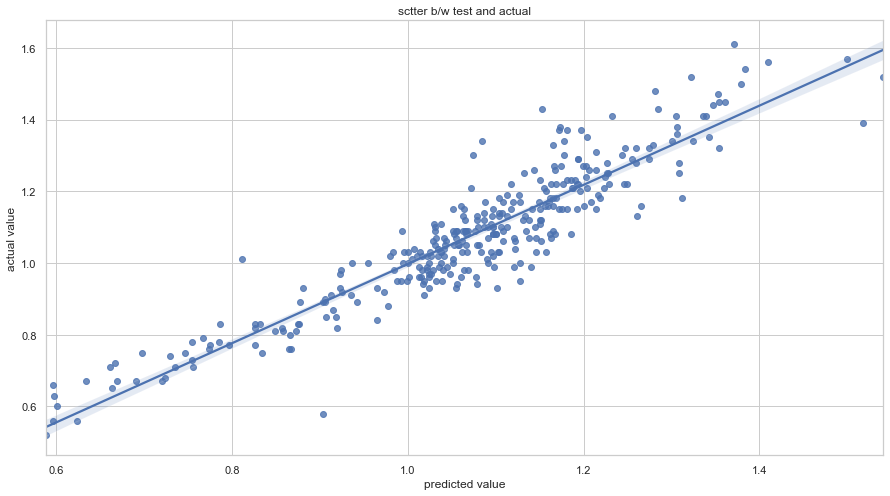

In [72]:
# visulization for predictions and actual value
plt.figure(figsize=(15,8))
sns.regplot(pred,y_test)
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("sctter b/w test and actual")

In [73]:
#save best model
import joblib

joblib.dump(adb,"avocado_average_price.pkl")

['avocado_average_price.pkl']

# Classification Model for Region

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [75]:
df_new.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [76]:


X=df_new.drop(["Unnamed: 0","region"],axis=1)
Y=df_new["region"]

In [77]:
#useing most classification models

model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB(),GaussianNB()]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.22,random_state=63)

for m in model:
    print("*******************************",m,"********************************")
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("AS:",accuracy_score(y_test,pred))
    print("CM:",confusion_matrix(y_test,pred)) 
    print("CR:",classification_report(y_test,pred))

    print("score:",m.score(x_train,y_train))
    print("\n")

******************************* SVC() ********************************
AS: 0.6645569620253164
CM: [[18  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  2  0 ...  6  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
CR:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.55      1.00      0.71        12
           2       0.62      1.00      0.76        16
           3       0.83      0.91      0.87        11
           4       0.38      0.75      0.50         8
           5       0.90      0.90      0.90        10
           6       0.62      1.00      0.77        10
           7       0.36      1.00      0.53         4
           8       0.00      0.00      0.00         6
           9       0.80      0.92      0.86        13
          10       1.00      0.40      0.57         5
          11       1.00      0.50      0.67         4
          12       1.00      1.00      

score: 0.9330357142857143




GaussianNB perform better than other 

In [80]:
#selecting best model and checking best random stats
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.23,random_state=r)
    gnb= GaussianNB() 
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    AC=accuracy_score(y_test,pred)
    if AC>max_r:
        max_r=AC
        final_AC=r
print("max accuracy_score corresponding to",final_AC,"is",max_r) 
print("CR:",classification_report(y_test,pred))

max accuracy_score corresponding to 80 is 0.9425981873111783
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      0.86      0.83        14
           2       1.00      1.00      1.00         8
           3       0.91      0.83      0.87        12
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        11
           7       1.00      0.71      0.83         7
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        12
          10       1.00      0.62      0.77         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         6
          16    

In [81]:
#boosing the best model
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier(base_estimator=gnb,n_estimators=35,learning_rate=0.1,random_state=43,algorithm="SAMME")
adb.fit(x_train,y_train)
predad=adb.predict(x_test)
print("AS:",accuracy_score(y_test,predad))
print("CM:",confusion_matrix(y_test,predad)) 
print("CR:",classification_report(y_test,predad))

AS: 0.9546827794561934
CM: [[17  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8
           3       0.92      0.92      0.92        12
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        11
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        12
          10       1.00      0.75      0.86         8
          11       1.00      0.83      0.91         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         3
  

In [82]:
#checking uderfiting and overfitting
cross=cross_val_score(adb,X,Y,cv=8)
print(cross.mean())
print(cross)

0.913679391682185
[0.81111111 0.91111111 0.94444444 0.94444444 0.94972067 0.91620112
 0.94972067 0.88268156]


Text(0.5, 1.0, 'scatterplot b/w actual value and predict value')

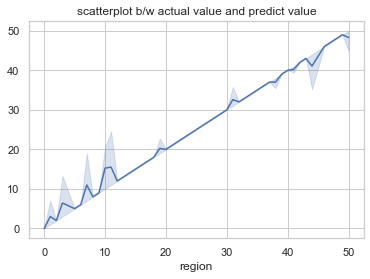

In [84]:
#visualize accuracy
sns.lineplot(y_test,predad)
plt.title("scatterplot b/w actual value and predict value")

In [ ]:
#save the best model
import joblib

joblib.dump(adb,"avocardo_region.pkl")